In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser


In [2]:
finetech=pd.read_csv("data.csv")

In [3]:
finetech.shape

(50000, 12)

In [4]:
finetech.head(6)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0


In [5]:
finetech.tail()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


In [6]:
for i in [1,2,3,4,5]:
    print(finetech.loc[i,'screen_list'],'\n')
    

joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2 

Splash,Cycle,Loan 

product_review,Home,product_review,Loan3,Finances,Credit3,ReferralContainer,Leaderboard,Rewards,RewardDetail,ScanPreview,location,VerifyDateOfBirth,VerifyPhone,VerifySSN,Credit1,Credit2 

idscreen,joinscreen,Cycle,Credit3Container,ScanPreview,VerifyPhone,VerifySSN,Credit1,Loan2,Home,Institutions,SelectInstitution,BankVerification,ReferralContainer,product_review,product_review2,VerifyCountry,VerifyToken,product_review 

idscreen,Cycle,Home,ScanPreview,VerifyPhone,VerifySSN,Credit1,Credit3Dashboard,Loan2,Institutions,product_review,product_review,product_review3 



In [7]:
finetech.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [8]:
finetech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [9]:
finetech.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
features=finetech.columns
for i in features:
    print("""unique value of {}\n{}\nlen is{}\n.....................\n""".format(i,finetech[i].unique(),len(finetech[i].unique())))

unique value of user
[235136 333588 254414 ... 302367 324905  27047]
len is49874
.....................

unique value of first_open
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']
len is49747
.....................

unique value of dayofweek
[3 6 1 4 2 0 5]
len is7
.....................

unique value of hour
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']
len is24
.....................

unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52  62  63  16  54  70  51  69  68  59  76  75  66  61
  72  65  90

In [11]:
finetech.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [12]:
finetech['hour']=finetech.hour.str.slice(1,3).astype(int)

In [13]:
finetech.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [14]:
finetech.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [15]:
finetech2=finetech.drop(['user','first_open','screen_list','enrolled_date'],axis=1)

In [16]:
finetech2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


Text(0.5, 1, 'heatmap usingncorrelation matrix of finetech2')

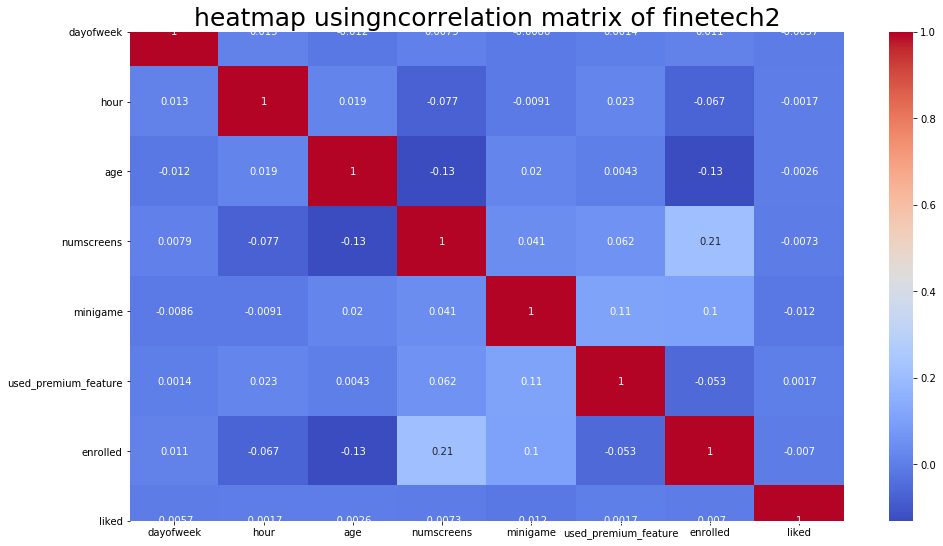

In [17]:
plt.figure(figsize=(16,9))
sns.heatmap(finetech2.corr(), annot = True,cmap='coolwarm')
plt.title("heatmap usingncorrelation matrix of finetech2",fontsize = 25)

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


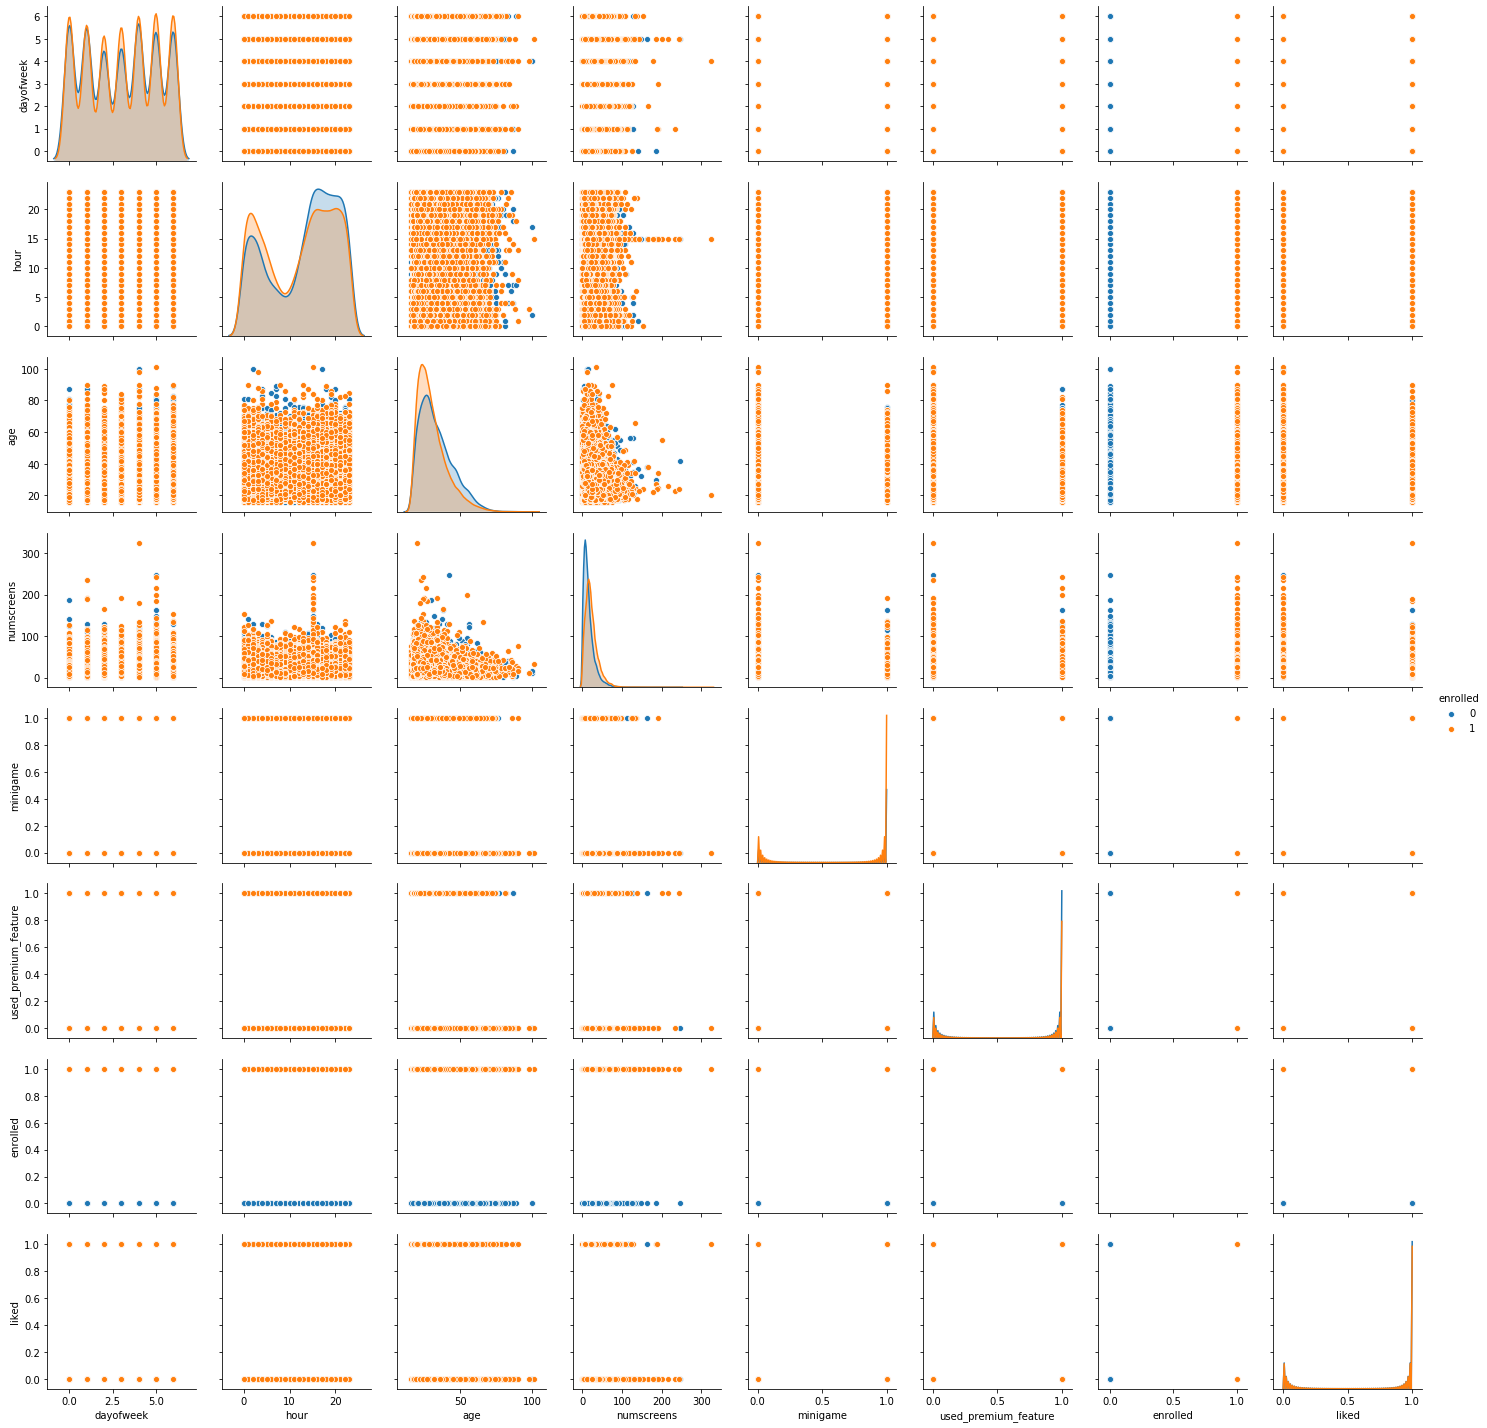

In [18]:
sns.pairplot(finetech2,hue = 'enrolled')

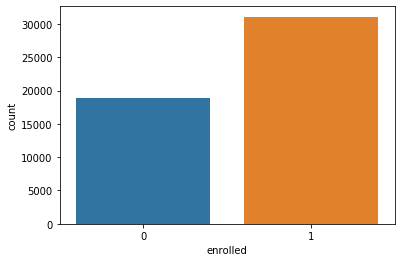

In [19]:
sns.countplot(finetech2.enrolled)

In [20]:
print("not enrolled user=",(finetech.enrolled<1).sum())
print("enrolled user=",50000-(finetech.enrolled<1).sum())

not enrolled user= 18926
enrolled user= 31074


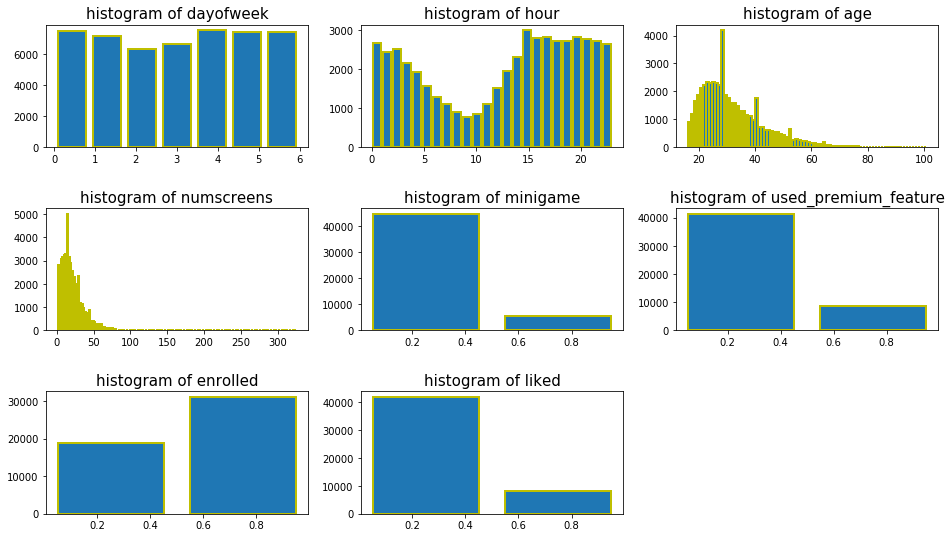

In [21]:
plt.figure(figsize=(16,9))
features=finetech2.columns
for i,j in enumerate(features):
    plt.subplot(3,3,i+1)
    plt.title("histogram of {}".format(j),fontsize = 15)
    
    bins = len(finetech2[j].unique())
    plt.hist(finetech2[j], bins = bins, rwidth = 0.8, edgecolor="y", linewidth = 2)
plt.subplots_adjust(hspace=0.5)

In [22]:
for i,j in enumerate(features):
    print(i,j)

0 dayofweek
1 hour
2 age
3 numscreens
4 minigame
5 used_premium_feature
6 enrolled
7 liked


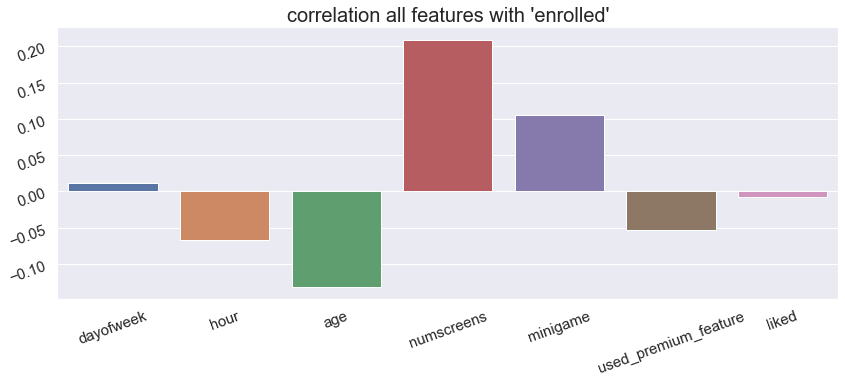

In [23]:
sns.set()
plt.figure(figsize=(14,5))
plt.title("correlation all features with 'enrolled'",fontsize = 20)
finetech3=finetech2.drop(['enrolled'],axis = 1)
ax=sns.barplot(finetech3.columns,finetech3.corrwith(finetech2.enrolled))
ax.tick_params(labelsize=15, labelrotation=20,color ="k")

In [24]:
finetech['first_open']=[parser.parse(i) for i in finetech['first_open']]

In [25]:
finetech['enrolled_date']=[parser.parse(i)if isinstance(i,str)else i for i in finetech['enrolled_date']]

In [26]:
finetech.dtypes


user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [27]:
finetech['time_to_enrolled'] = (finetech.enrolled_date - finetech.first_open ).astype('timedelta64[h]')

(array([2.8195e+04, 1.0320e+03, 5.6700e+02, 4.2500e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([   0. ,  543.4, 1086.8, 1630.2, 2173.6, 2717. , 3260.4, 3803.8,
        4347.2, 4890.6, 5434. ]),
 <a list of 10 Patch objects>)

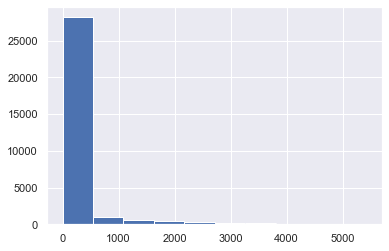

In [28]:
plt.hist(finetech['time_to_enrolled'].dropna())

(array([22793.,   755.,   707.,   288.,   347.,   210.,   187.,   212.,
          135.,   194.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

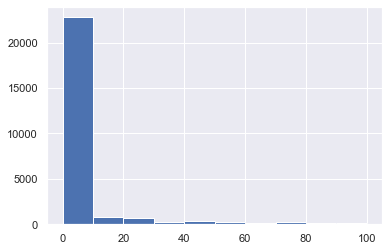

In [29]:
plt.hist(finetech['time_to_enrolled'].dropna(),range = (0,100))

In [30]:
finetech.loc[finetech.time_to_enrolled>48,'enrolled'] = 0

In [31]:
finetech

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,time_to_enrolled
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0,0.0
49996,169179,2013-04-09 00:05:17.823,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaT,0,NaN
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaT,0,NaN
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0,0.0


In [32]:
finetech.drop(columns = ['time_to_enrolled','enrolled_date','first_open'],inplace=True)

In [33]:
finetech

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


In [34]:
finetech_screen=pd.read_csv("datatop.csv")


In [35]:
finetech_screen


,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone
5,5,BankVerification
6,6,VerifyDateOfBirth
7,7,ProfilePage
8,8,VerifyCountry
9,9,Cycle


In [36]:
type(finetech_screen)

pandas.core.frame.DataFrame

In [37]:
finetech['screen_list'] = finetech_screen.astype(str) + ','

In [38]:
finetech_screen

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone
5,5,BankVerification
6,6,VerifyDateOfBirth
7,7,ProfilePage
8,8,VerifyCountry
9,9,Cycle


In [39]:
finetech['screen_list'] = finetech.screen_list.astype(str)+','

In [40]:
for screen_name in finetech_screen:
    finetech[screen_name] = finetech.screen_list.str.contains(screen_name).astype(int)
    finetech['screen_list'] = finetech.screen_list.str.replace(screen_name+",", "")

In [41]:
finetech.shape

(50000, 12)

In [42]:
finetech.head(6)

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,Unnamed: 0,top_screens
0,235136,3,2,23,"0,,",15,0,0,0,0,0,0
1,333588,6,1,24,"1,,",13,0,0,0,0,0,0
2,254414,1,19,23,"2,,",3,0,1,0,1,0,0
3,234192,4,16,28,"3,,",40,0,0,1,0,0,0
4,51549,1,18,31,"4,,",32,0,0,1,1,0,0
5,56480,2,9,20,"5,,",14,0,0,1,0,0,0


In [43]:
finetech.loc[0,'screen_list']

'0,,'

In [44]:
finetech['remain_screen_list'] =finetech.screen_list.str.count(",")

In [45]:
finetech.drop(columns=['screen_list'],inplace= True)

In [46]:
finetech.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Unnamed: 0',
       'top_screens', 'remain_screen_list'],
      dtype='object')

In [47]:
finetech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
dayofweek               50000 non-null int64
hour                    50000 non-null int32
age                     50000 non-null int64
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
liked                   50000 non-null int64
Unnamed: 0              50000 non-null int32
top_screens             50000 non-null int32
remain_screen_list      50000 non-null int64
dtypes: int32(3), int64(9)
memory usage: 4.0 MB


In [48]:
finetech.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Unnamed: 0,top_screens,remain_screen_list
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.0,0.0,1.001160
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.0,0.0,0.034039
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,2.000000


In [49]:
cleanfinetech=pd.read_csv("cleandata.csv")

In [50]:
cleanfinetech=finetech

In [51]:
target=finetech['enrolled']
finetech.drop(columns='enrolled',inplace=True)

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(finetech,target,test_size=0.2,random_state=0)

In [53]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', Y_train.shape)
print('Shape of y_test = ', Y_test.shape)

Shape of X_train =  (40000, 11)
Shape of X_test =  (10000, 11)
Shape of y_train =  (40000,)
Shape of y_test =  (10000,)


In [54]:
train_userID=X_train['user']
X_train.drop(columns='user',inplace=True)
test_userID=X_test['user']
X_test.drop(columns='user',inplace =True)


C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [55]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of train_userID = ', train_userID.shape)
print('Shape of test_userID = ', test_userID.shape)

Shape of X_train =  (40000, 10)
Shape of X_test =  (10000, 10)
Shape of train_userID =  (40000,)
Shape of test_userID =  (10000,)


In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc =sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [57]:
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score

In [58]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='entropy',random_state=0)
dt_model.fit(X_train,Y_train)
Y_pred_dt=dt_model.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred_dt)
print("accuracy =",accuracy)

accuracy = 0.561


In [59]:
#from k neighbour
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,)
knn_model.fit(X_train, Y_train)
Y_pred_knn = knn_model.predict(X_test)
 
accuracy=accuracy_score(Y_test, Y_pred_knn)
print("accuracy =",accuracy)

accuracy = 0.5967


In [60]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
Y_pred_nb = nb_model.predict(X_test)
 
accuracy=accuracy_score(Y_test, Y_pred_nb)
print("accuracy =",accuracy)

accuracy = 0.62


In [61]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)
 
accuracy=accuracy_score(Y_test, Y_pred_rf)
print("accuracy =",accuracy)

accuracy = 0.5909


In [62]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 0, penalty = 'l1')
lr_model.fit(X_train, Y_train)
Y_pred_lr = lr_model.predict(X_test)
 
accuracy_score(Y_test, Y_pred_lr)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6353

Text(0.5, 1, 'confussion Matrix')

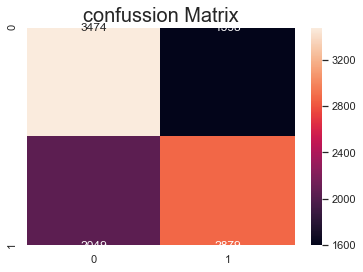

In [63]:
cm=confusion_matrix(Y_test,Y_pred_lr)
sns.heatmap(cm,annot=True,fmt='g')
plt.title("confussion Matrix",fontsize=20)

In [64]:
cr=classification_report(Y_test,Y_pred_lr)

In [65]:
print("classification report>>>\n",cr)

classification report>>>
               precision    recall  f1-score   support

           0       0.63      0.68      0.66      5072
           1       0.64      0.58      0.61      4928

    accuracy                           0.64     10000
   macro avg       0.64      0.63      0.63     10000
weighted avg       0.64      0.64      0.63     10000



In [66]:
final_result = pd.concat([test_userID, Y_test], axis = 1)
final_result['predicted result'] = Y_pred_lr

In [67]:
print(final_result)

         user  enrolled  predicted result
11841  239786         1                 1
19602  279644         1                 1
45519   98290         0                 0
25747  170150         1                 1
42642  237568         1                 1
...       ...       ...               ...
25091  143036         1                 1
27853   91158         1                 0
47278  248318         0                 1
37020  142418         1                 1
2217   279355         1                 1

[10000 rows x 3 columns]


In [68]:
import pickle
 
# save model
pickle.dump(lr_model, open('FineTech_app_ML_model.pickle', 'wb'))
 
# load model
ml_model_pl = pickle.load(open('FineTech_app_ML_model.pickle', 'rb'))
 
# predict the output
y_pred_pl = lr_model.predict(X_test)
 
# confusion matrix
cm_pl = confusion_matrix(Y_test, Y_pred_lr)
print('Confussion matrix = \n', cm_pl)
 
# show the accuracy
print("Accuracy of model = ",accuracy_score(Y_test, Y_pred_lr))

Confussion matrix = 
 [[3474 1598]
 [2049 2879]]
Accuracy of model =  0.6353


In [69]:
from sklearn.externals import joblib
 
# save model
joblib.dump(lr_model, 'FineTech_app_ML_model.joblib')
 
# load model
ml_model_jl = joblib.load('FineTech_app_ML_model.joblib')
 
# predict the output 
y_pred_jl = lr_model.predict(X_test)
 
cm_jl = confusion_matrix(Y_test, Y_pred_lr)
print('Confussion matrix = \n', cm_jl)
 
print("Accuracy of model = ", accuracy_score(Y_test, Y_pred_lr))

Confussion matrix = 
 [[3474 1598]
 [2049 2879]]
Accuracy of model =  0.6353


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
